<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/multiple_linear_regression_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
#
# Load data
#

(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

In [34]:
#
# Exploratory Analasys
#

print(f'train_data.shape = {train_data.shape}')
print(f'test_data.shape = {test_data.shape}')

train_data.shape = (404, 13)
test_data.shape = (102, 13)


Boston house prices dataset
---------------------------
**Data Set Characteristics:**  
Number of Instances: 506    
Number of Attributes: 13 numeric/categorical predictive. Median Value   (attribute 14) is usually the target.  
Attribute Information (in order): 
 
* CRIM     per capita crime rate by town   
* ZN       proportion of residential land zoned for lots over 25,000 sq ft.  
* INDUS    proportion of non-retail business acres per town   
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
* NOX      nitric oxides concentration (parts per 10 million)  
* RM       average number of rooms per dwelling  
* AGE      proportion of owner-occupied units built prior to 1940  
* DIS      weighted distances to five Boston employment centres  
* RAD      index of accessibility to radial highways  
* TAX      full-value property-tax rate per \$10,000  
* PTRATIO  pupil-teacher ratio by town  
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
* LSTAT    % lower status of the population  
* MEDV     Median value of owner-occupied homes in \$1000's  

Missing Attribute Values: None  
Creator: Harrison, D. and Rubinfeld, D.L.  
This is a copy of UCI ML housing dataset.  
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/  

In [35]:
#
# Exploratory Analasys
#

# Load data into Pandas dataframe and apply column names for easier feature
# identification later.

train_features = pd.DataFrame(train_data, columns=[
  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
  'PTRATIO', 'B', 'LSTAT'])

test_features = pd.DataFrame(test_data, columns=[
  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
  'PTRATIO', 'B', 'LSTAT'])

train_labels = pd.DataFrame(train_targets, columns=['MEDV'])
test_labels = pd.DataFrame(test_targets, columns=['MEDV'])

train=pd.concat([train_features, train_labels], axis=1)

# display(df_train)
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


There are 404 samples in trainig set and 102 samples in test set.

In [36]:
#
# Exploratory Analasys
#

print(f'Feature minimums:\n{train.min()}\n\n')
print(f'Feature maximums:\n{train.max()}')

Feature minimums:
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        188.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64


Feature maximums:
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7250
AGE        100.0000
DIS         10.7103
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


We can see that features are at different scales so training and test set should be normalized before training. 

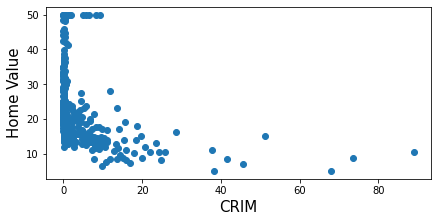

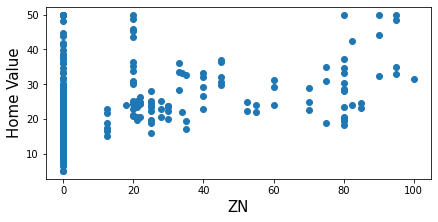

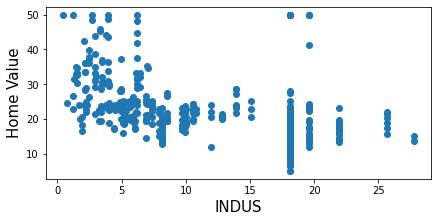

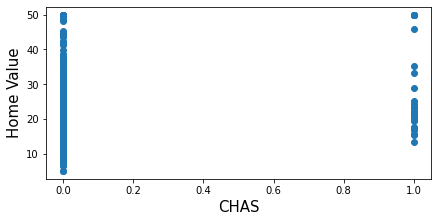

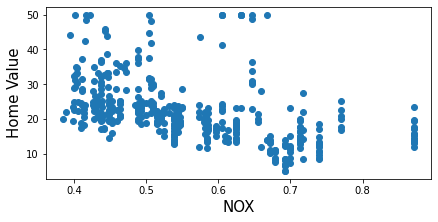

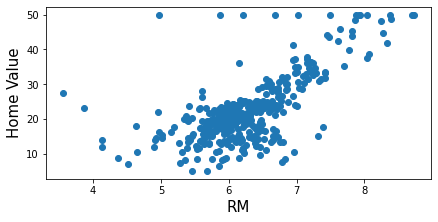

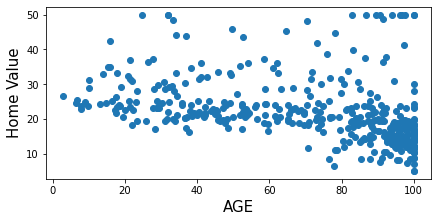

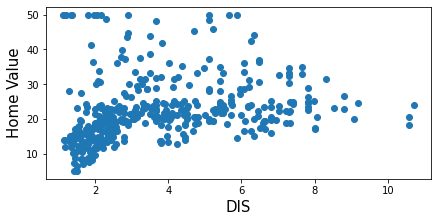

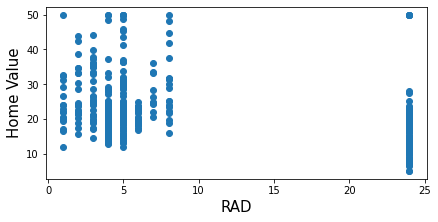

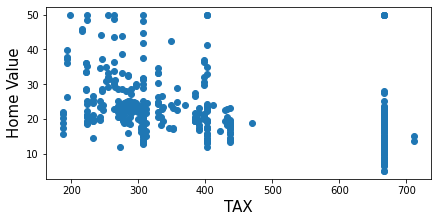

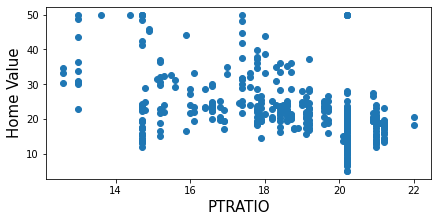

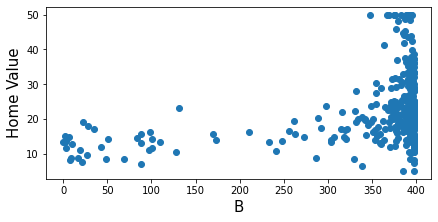

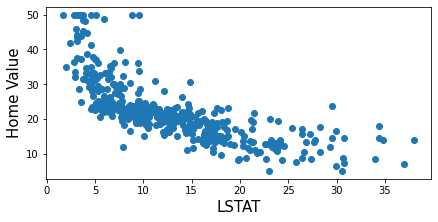

In [37]:
#
# Exploratory Analasys
#

# To be able to fit a linear regression model, there must be a linear
# relationship between each regressor and the target.
# If we plot each regressor against the target (MEDV) we can check if
# target value has linear or non-linear dependencies on features/regressors: 

for index, feature_name in enumerate(train_features.columns):
    plt.figure(figsize=(6, 3))
    plt.scatter(train_features.iloc[:, index], train_labels)
    plt.ylabel('Home Value', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

We can see that House value has a non-linear dependency on multiple features: ZN, INDUS, NOX, LSTAT, AGE, DIS, B.

This means we need to:
* use more than one neuron
* these neurons need to:
 * have non-linear activation function
 * be in the hidden layer 
* output layer neuron needs to have identity (linear) activation function (as 
this is a regression problem)


In [38]:
#
# Feature Normalization (Standardization)
# It rescales data to have mean = 0 and standard deviation of 1 (unit variance).
#

print(f'train_features.mean() = \n{train_features.mean()}\n\n')
print(f'train_features.std() = \n{train_features.std()}\n\n')

train_features_normalized = (train_features - train_features.mean()) / train_features.std()
print(f'train_features_normalized.shape = {train_features_normalized.shape}\n\n')
#print(train_features_normalized)
train_features_normalized.head()

# Note that test data is normalized by using quantities calculated on the
# training data.
test_features_normalized = (test_features - train_features.mean()) / train_features.std()
print(f'test_features_normalized.shape = {test_features_normalized.shape}\n\n')
#print(test_features_normalized)
test_features_normalized.head()

train_features.mean() = 
CRIM         3.745111
ZN          11.480198
INDUS       11.104431
CHAS         0.061881
NOX          0.557356
RM           6.267082
AGE         69.010644
DIS          3.740271
RAD          9.440594
TAX        405.898515
PTRATIO     18.475990
B          354.783168
LSTAT       12.740817
dtype: float64


train_features.std() = 
CRIM         9.240734
ZN          23.767711
INDUS        6.811308
CHAS         0.241238
NOX          0.117293
RM           0.709788
AGE         27.940665
DIS          2.030215
RAD          8.698360
TAX        166.374543
PTRATIO      2.200382
B           94.111148
LSTAT        7.254545
dtype: float64


train_features_normalized.shape = (404, 13)


test_features_normalized.shape = (102, 13)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.551769,-0.483017,1.027052,-0.256515,1.037095,0.235167,1.109113,-0.938606,1.673810,1.563349,0.783505,-3.480280,2.248133
1,-0.391941,-0.483017,-0.160679,-0.256515,-0.088291,-0.498856,0.855003,-0.683115,-0.395545,0.156884,-0.307215,0.426802,0.478208
2,-0.399334,-0.483017,-0.868325,-0.256515,-0.361112,-0.397417,-0.845028,0.527988,-0.510509,-1.093307,0.783505,0.447522,-0.413646
3,-0.267473,-0.483017,1.244338,3.888763,0.406197,-0.024066,0.844266,-0.956485,-0.510509,-0.017422,-1.716061,-0.168558,-0.998108
4,-0.397544,-0.483017,-0.971096,-0.256515,-0.923805,-0.205810,-0.437021,0.003610,-0.740438,-0.955065,0.010912,0.428927,-0.592844


In [39]:
#
# Build a model with a single neuron which takes a single feature as an input
# (This is a neural network with no hidden layers and no activations)
#

FEATURES_COUNT = train_features.shape[1]
print(f'FEATURES_COUNT = {FEATURES_COUNT}')

model = tf.keras.Sequential([
    layers.Dense(input_shape=(FEATURES_COUNT,), units=64, activation='relu'),
    layers.Dense(units=1)
])

model.summary()

FEATURES_COUNT = 13
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [40]:
#
# Compile the model
#

LEARNING_RATE = 0.001
OPTIMIZER=tf.optimizers.RMSprop(learning_rate=LEARNING_RATE)

# Loss function is Mean Squared Error, the square of the difference between the 
# predictions and the targets, a widely used loss function for regression 
# problems.
LOSS = tf.losses.MeanSquaredError()

# We are monitoring a Mean Absolute Error (MAE) metric during training: MAE. It 
# is simply the absolute value of the difference between the predictions and the 
# targets. Example: MAE of 1 on this problem would mean that our predictions are 
# off by $1000 on average.

METRICS = [tf.metrics.MeanAbsoluteError()]

model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=METRICS
)

In [41]:
#
# Train the model
#
%%time

EPOCHS = 100

history = model.fit(
    train_features_normalized, train_labels,
    epochs=EPOCHS,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.92 s, sys: 196 ms, total: 4.11 s
Wall time: 5.96 s


In [42]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


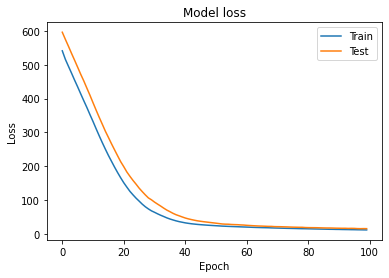

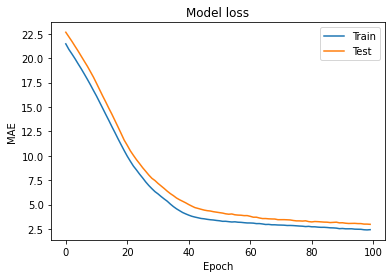

In [45]:
#
# Plot how loss changes over each epoch.
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [44]:
#
# Perform prediction on unseen data
#

predictions = model.predict(test_features_normalized)
print(predictions.shape)

# append a predictions column to the test 
predictions = test_features.assign(MEDV=predictions)
display(predictions)

(102, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.491373
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.001436
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,20.865091
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,31.661261
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,25.057642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,41.077492
98,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,25.088280
99,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,42.335129
100,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,31.871994
